# Time series exploration

objectif : avoir une vue d'ensemble sur les donnees produites avec le pipeline airflow.
   - Approche plus orientée temps
   - identification des saisonnalité et des tendances

## Librairies

In [1]:
import os
import glob

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


## Load dataset

In [2]:
# Path to dir to save figures
figures_path = 'figures/'
# List of files
files_path = "../seizure_detection_pipeline/output/cons-v0_6/*/cons_PAT_*.csv"
# # Path to output files
res_path = "res/general/"

# Creation of a list of file path
patient_files = glob.glob(files_path, recursive = True)
df_files = pd.DataFrame(patient_files, columns = ['path'])


def extract_patient_id(path):
    return int(path.split('cons_PAT_')[1].split('_Annotations')[0])

def extract_session_id(path):
    return int(path.split('_s')[0].split('_')[-1])

def extract_segment_id(path):
    return int(path.split('_s')[1].split('.csv')[0])


df_files['patient_id'] = df_files['path'].apply(extract_patient_id)
df_files['session_id'] = df_files['path'].apply(extract_session_id)
df_files['segment_id'] = df_files['path'].apply(extract_segment_id)

## Sessions exploration

In [12]:
df_session_18 = pd.read_csv(df_files.loc[15]["path"])

df_session_50 = pd.read_csv(df_files.loc[106]["path"])

In [13]:
df_session_18 = df_session_18.sort_values(by = 'timestamp').reset_index(drop=True)
df_session_50 = df_session_50.sort_values(by = 'timestamp').reset_index(drop=True)

In [9]:
df_session_18 = df_session_18.set_index('timestamp')
df_session_50 = df_session_50.set_index('timestamp')

In [5]:
df_session_18.head()

,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,...,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,timestamp,filename,label
0,1.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-13 15:28:19.750,/home/aura-sakhite/seizure_detection_pipeline/...,0
1,2.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-13 15:28:20.750,/home/aura-sakhite/seizure_detection_pipeline/...,0
2,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-13 15:28:21.750,/home/aura-sakhite/seizure_detection_pipeline/...,0
3,4.0,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-13 15:28:22.750,/home/aura-sakhite/seizure_detection_pipeline/...,0
4,5.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-13 15:28:23.750,/home/aura-sakhite/seizure_detection_pipeline/...,0


In [6]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

#### Patient 18

#### Relation en les variables les plus corrélées au label : patient 18

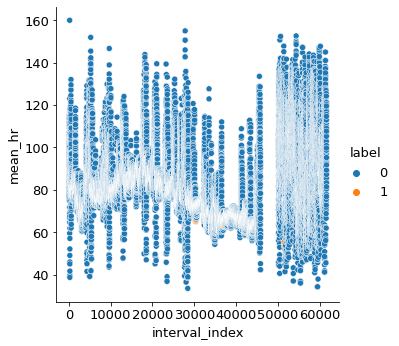

In [7]:
sns.relplot(data=df_session_18, x="interval_index", y="mean_hr", hue="label")

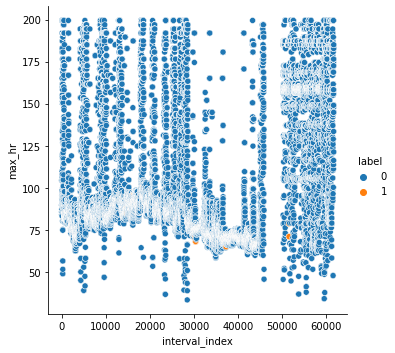

In [10]:
sns.relplot(data=df_session_18, x="interval_index", y="max_hr", hue="label")

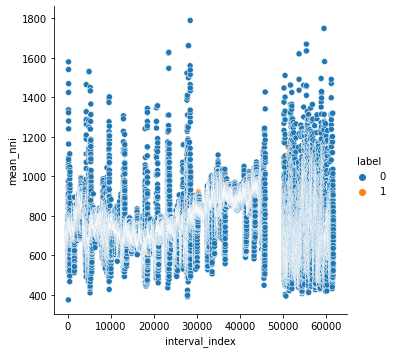

In [11]:
sns.relplot(data=df_session_18, x="interval_index", y="mean_nni", hue="label")

#### Relation entre les variables les moins corrélées au label : patient 18

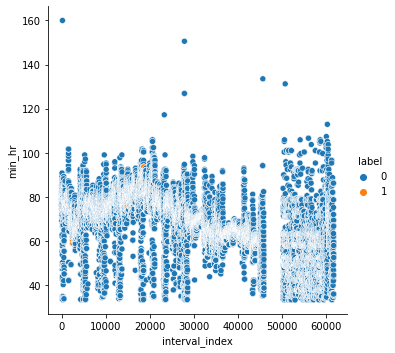

In [16]:
sns.relplot(data=df_session_18, x="interval_index", y="min_hr", hue="label")

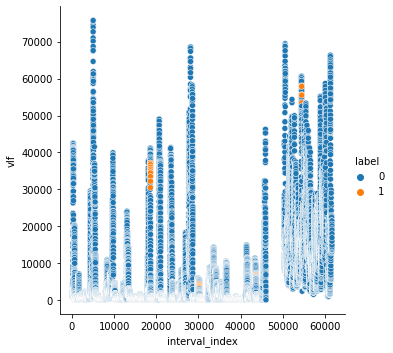

In [17]:
sns.relplot(data=df_session_18, x="interval_index", y="vlf", hue="label")

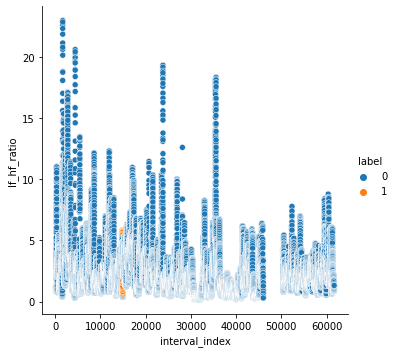

In [18]:
sns.relplot(data=df_session_18, x="interval_index", y="lf_hf_ratio", hue="label")

#### Decomposition des variables corrélées

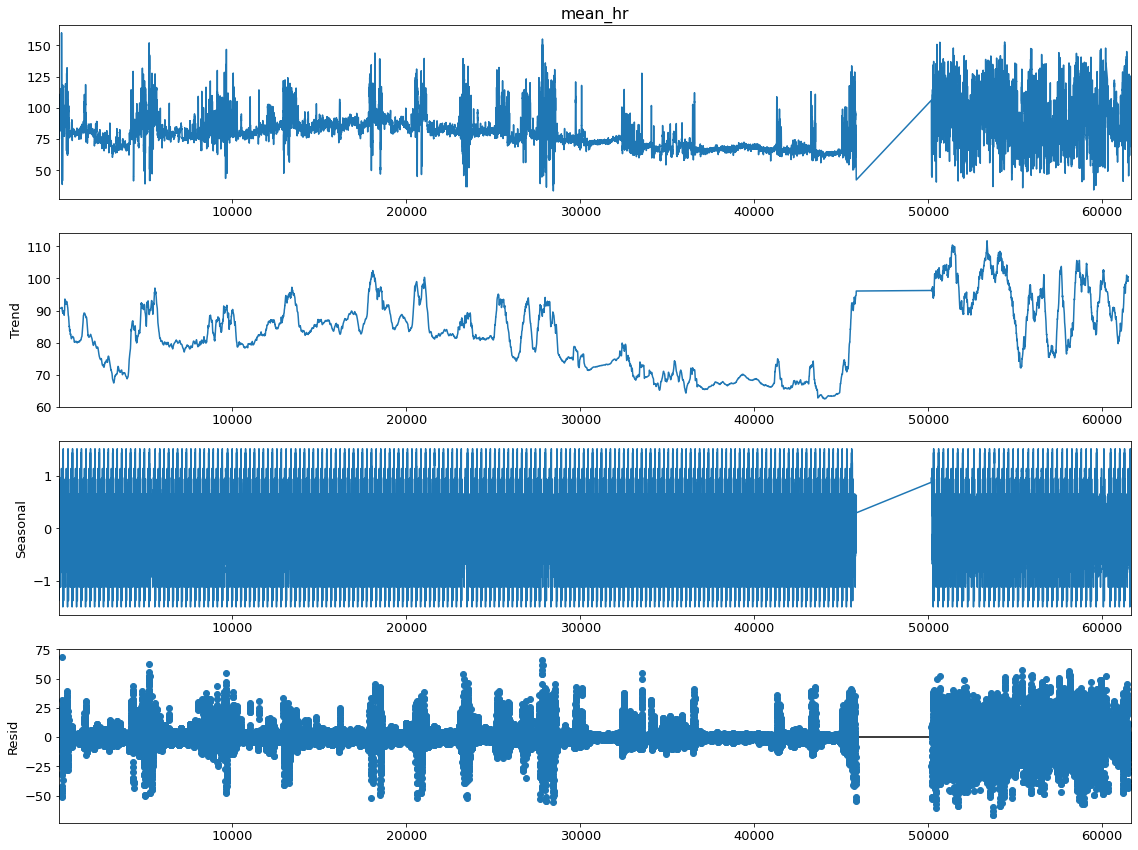

In [28]:
# decomposition
decomposition = sm.tsa.seasonal_decompose(df_session_18['mean_hr'].dropna(), period=256) 
figure = decomposition.plot()
plt.show()

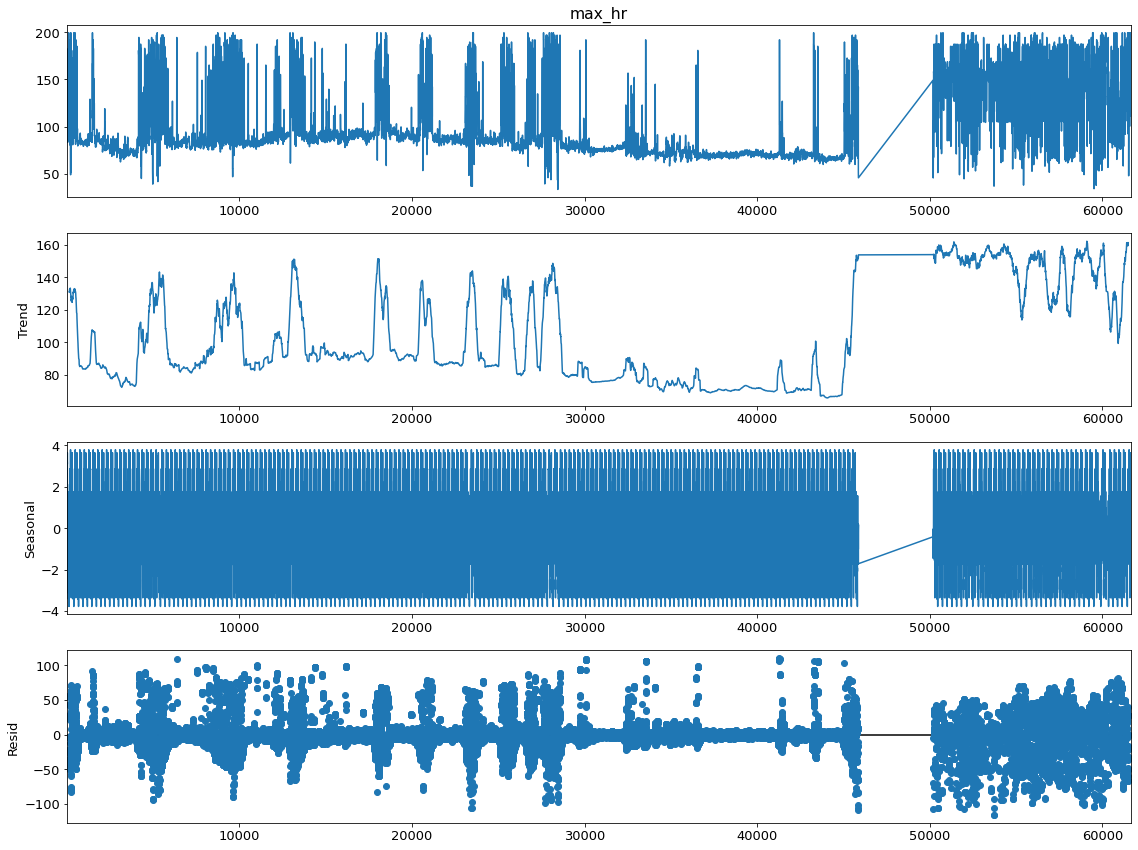

In [51]:
decomposition = sm.tsa.seasonal_decompose(df_session_18['max_hr'].dropna(), period=256) 
figure = decomposition.plot()
plt.show()

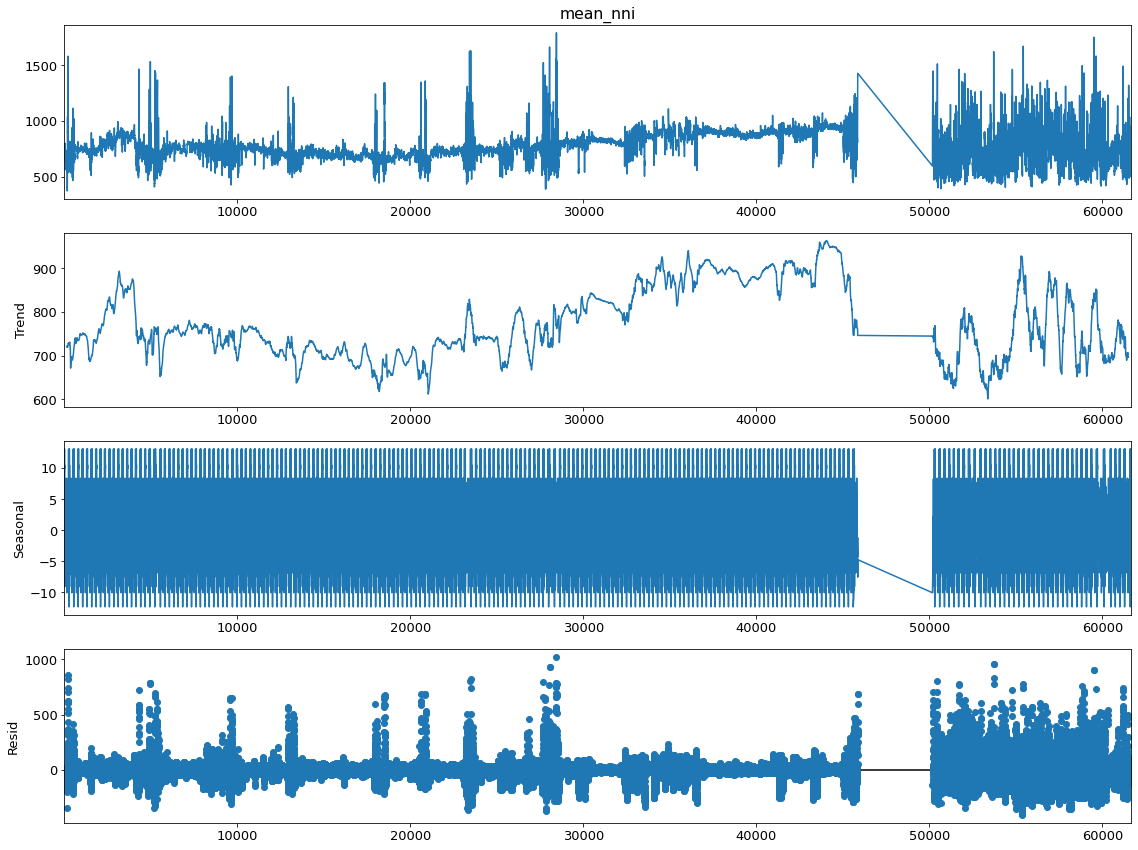

In [53]:
decomposition = sm.tsa.seasonal_decompose(df_session_18['mean_nni'].dropna(), period=256) 
figure = decomposition.plot()
plt.show()

#### Decomposition des variables moins corrélées

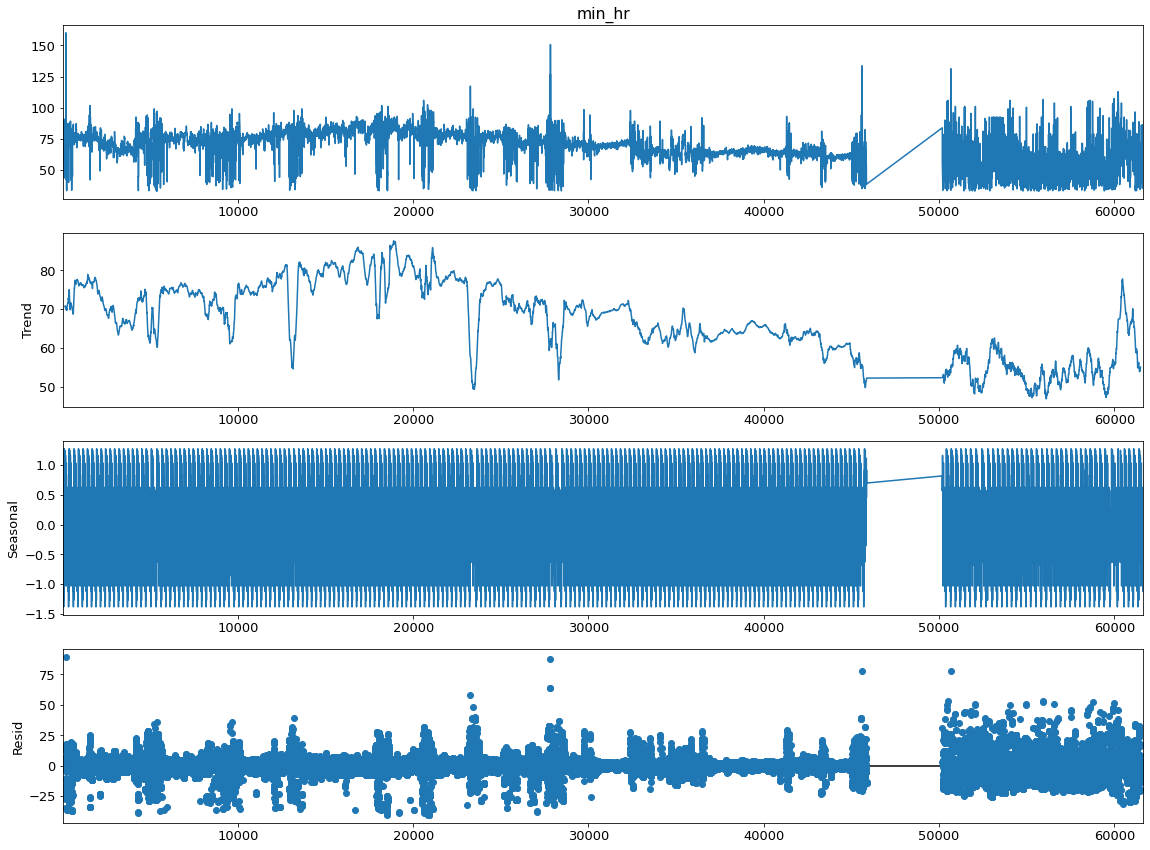

In [54]:
decomposition = sm.tsa.seasonal_decompose(df_session_18['min_hr'].dropna(), period=256) 
figure = decomposition.plot()
plt.show()

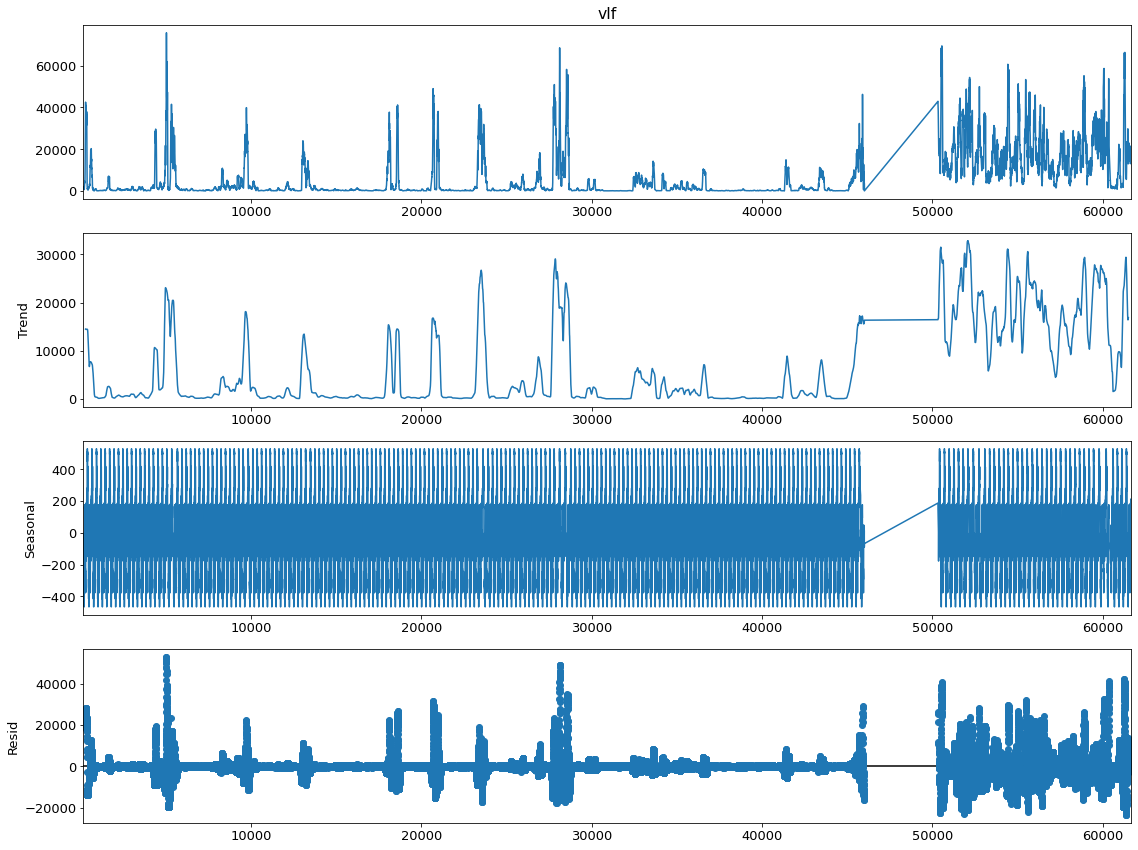

In [55]:
decomposition = sm.tsa.seasonal_decompose(df_session_18['vlf'].dropna(), period=256) 
figure = decomposition.plot()
plt.show()

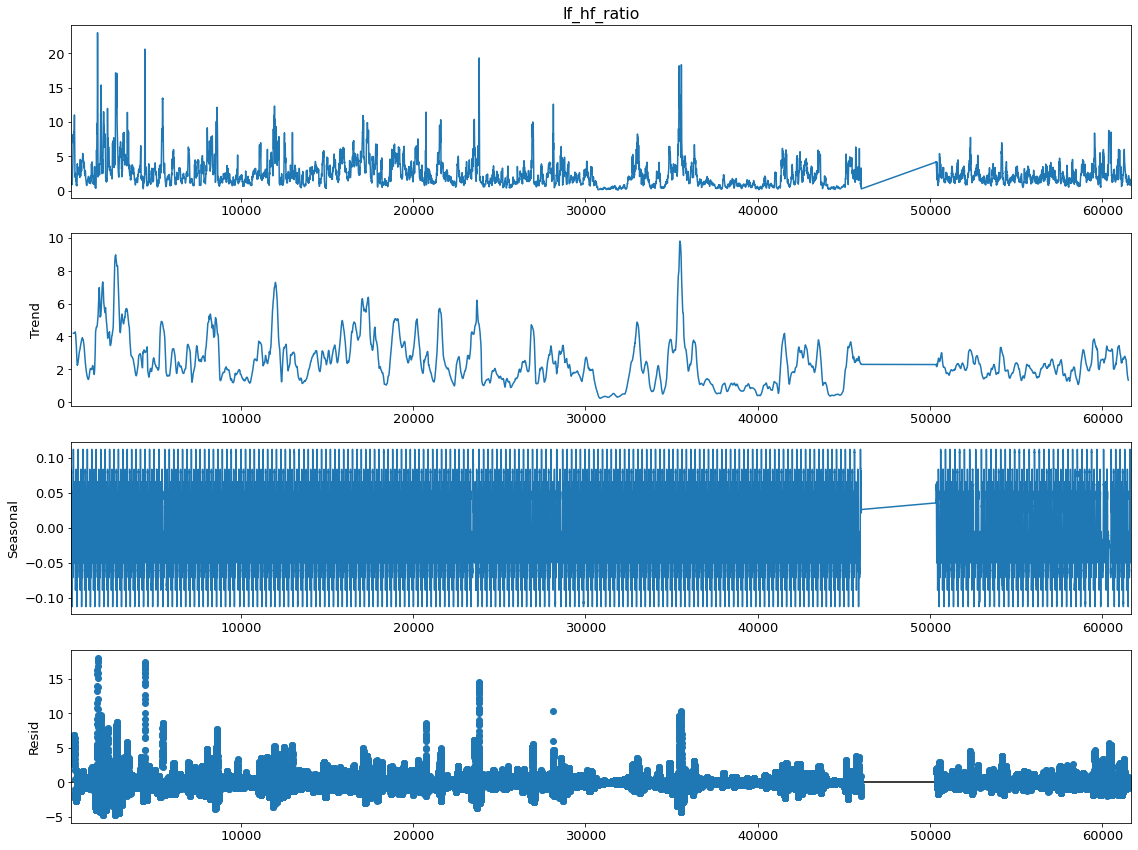

In [59]:
decomposition = sm.tsa.seasonal_decompose(df_session_18['lf_hf_ratio'].dropna(), period=256) 
figure = decomposition.plot()
plt.show()

#### Patient 50

#### Relation en les variables les plus corrélées au label

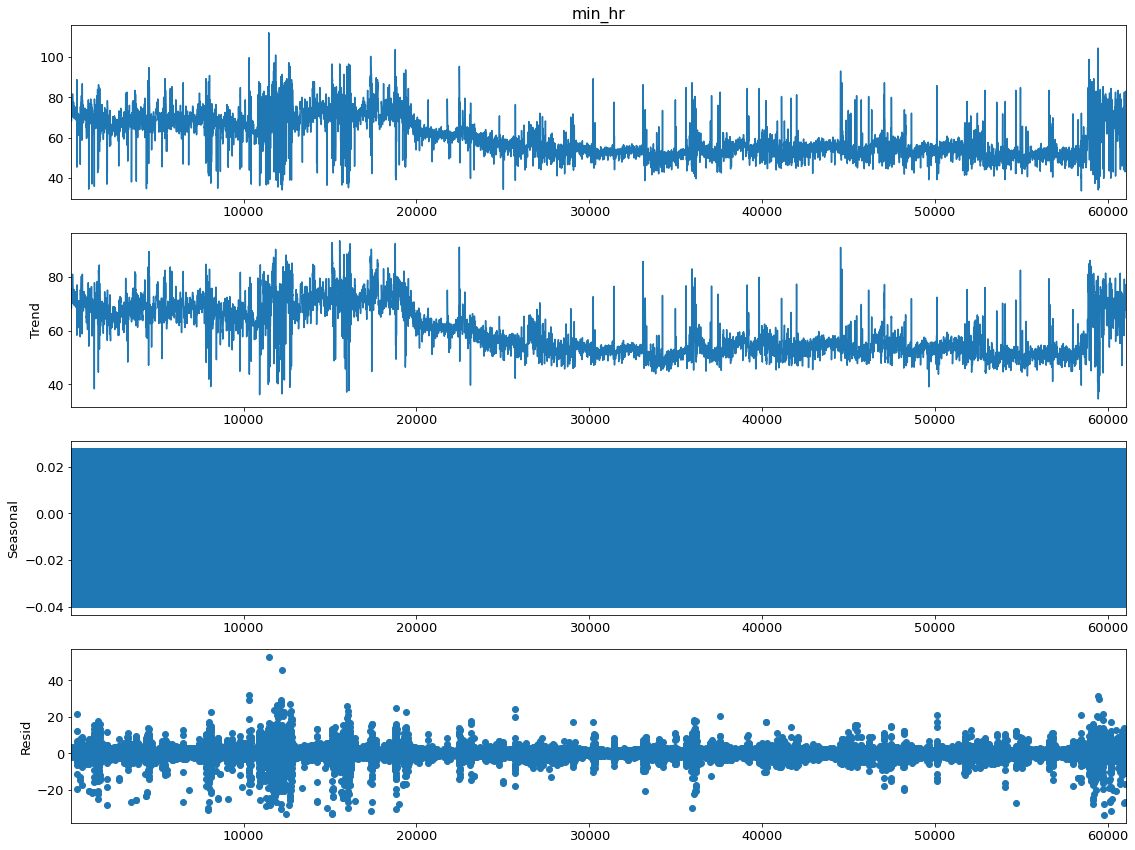

In [77]:
decomposition = sm.tsa.seasonal_decompose(df_session_50['min_hr'].dropna(), period=8) 
figure = decomposition.plot()
plt.show()

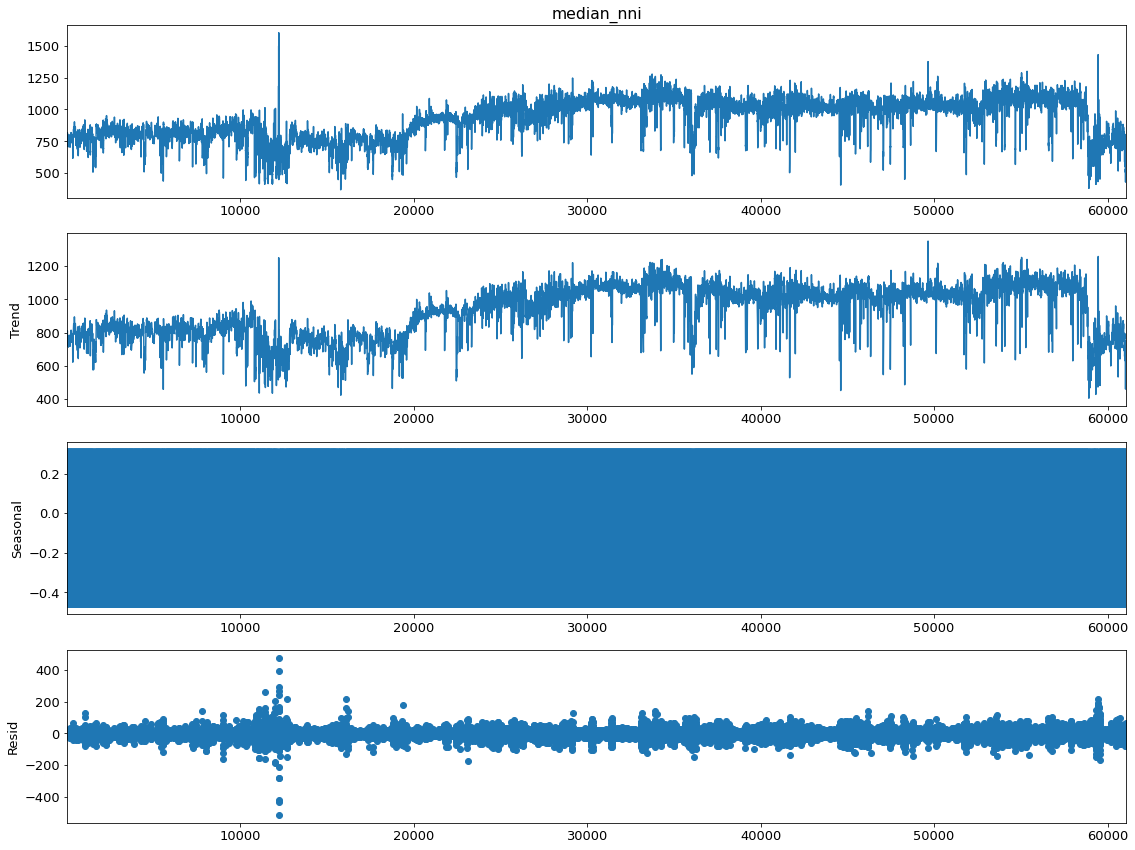

In [78]:
decomposition = sm.tsa.seasonal_decompose(df_session_50['median_nni'].dropna(), period=8) 
figure = decomposition.plot()
plt.show()

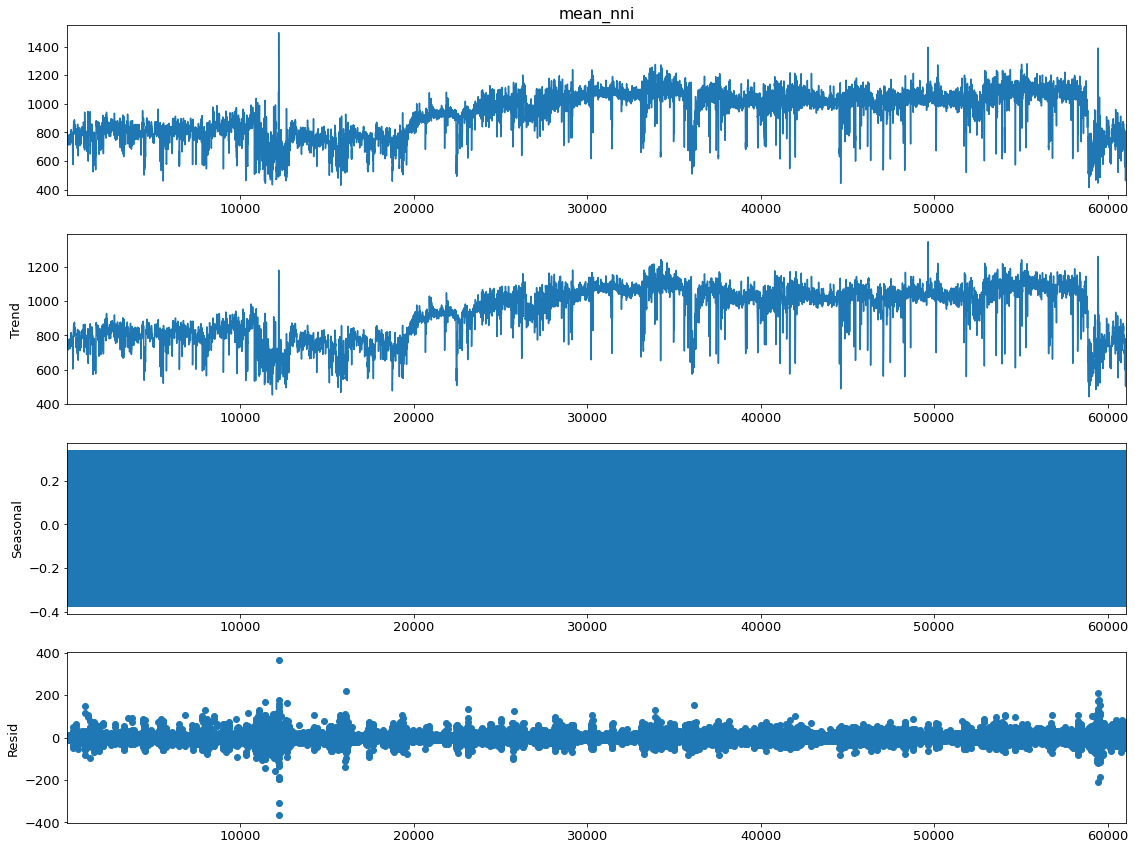

In [79]:
decomposition = sm.tsa.seasonal_decompose(df_session_50['mean_nni'].dropna(), period=8) 
figure = decomposition.plot()
plt.show()

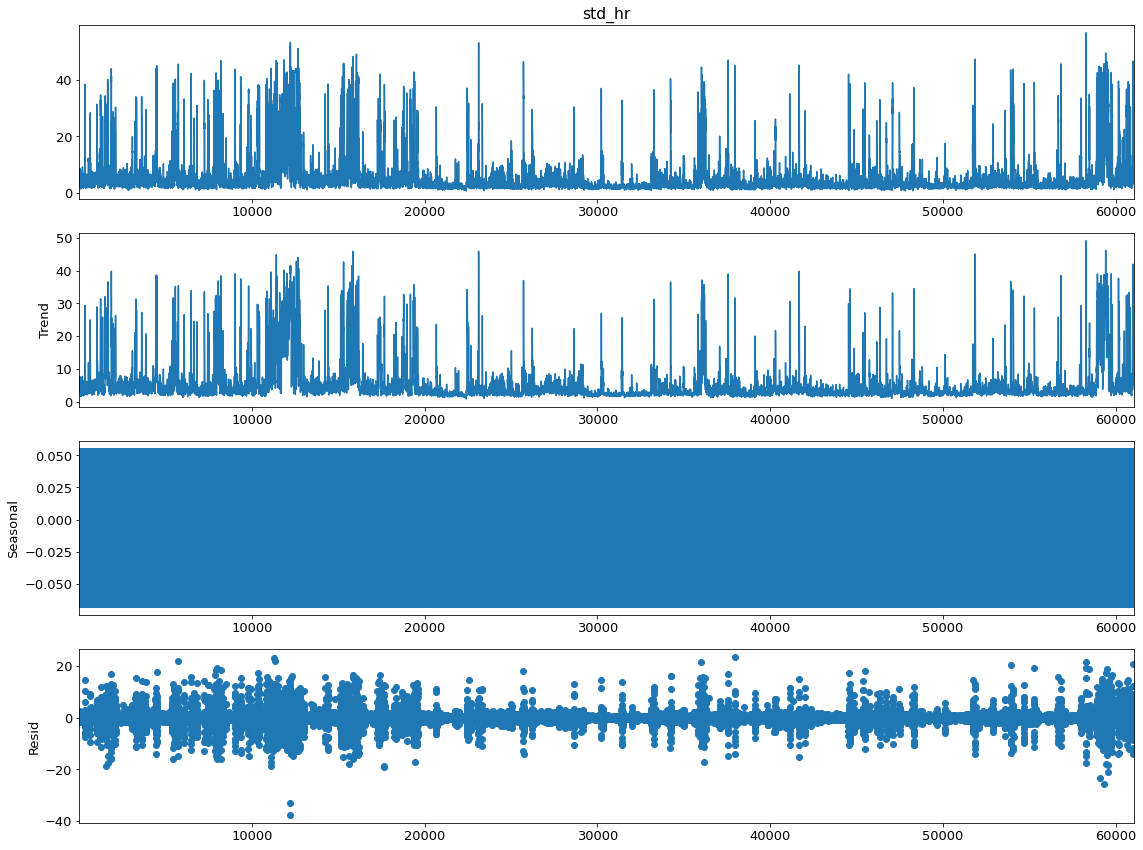

In [80]:
decomposition = sm.tsa.seasonal_decompose(df_session_50['std_hr'].dropna(), period=8) 
figure = decomposition.plot()
plt.show()

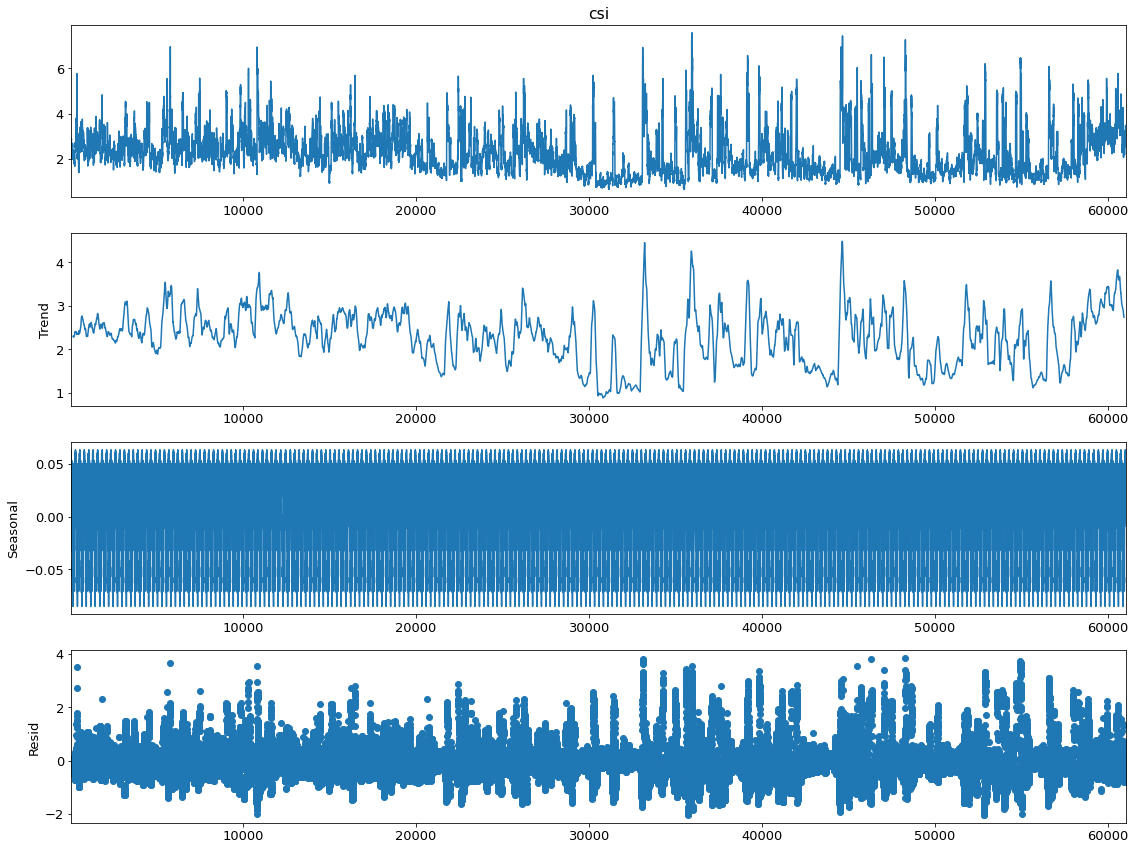

In [29]:
decomposition = sm.tsa.seasonal_decompose(df_session_50['csi'].dropna(), period=256) 
figure = decomposition.plot()
plt.show()

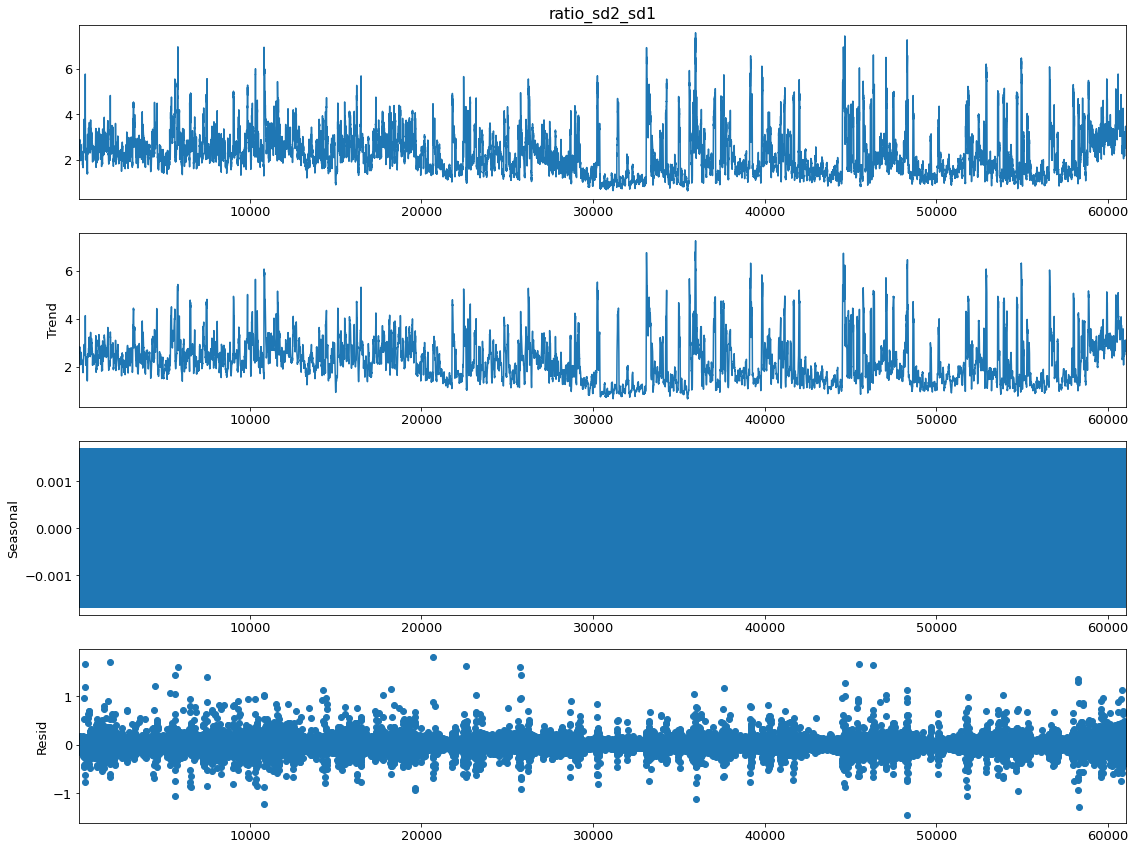

In [82]:
decomposition = sm.tsa.seasonal_decompose(df_session_50['ratio_sd2_sd1'].dropna(), period=8) 
figure = decomposition.plot()
plt.show()

#### Autocorrélation

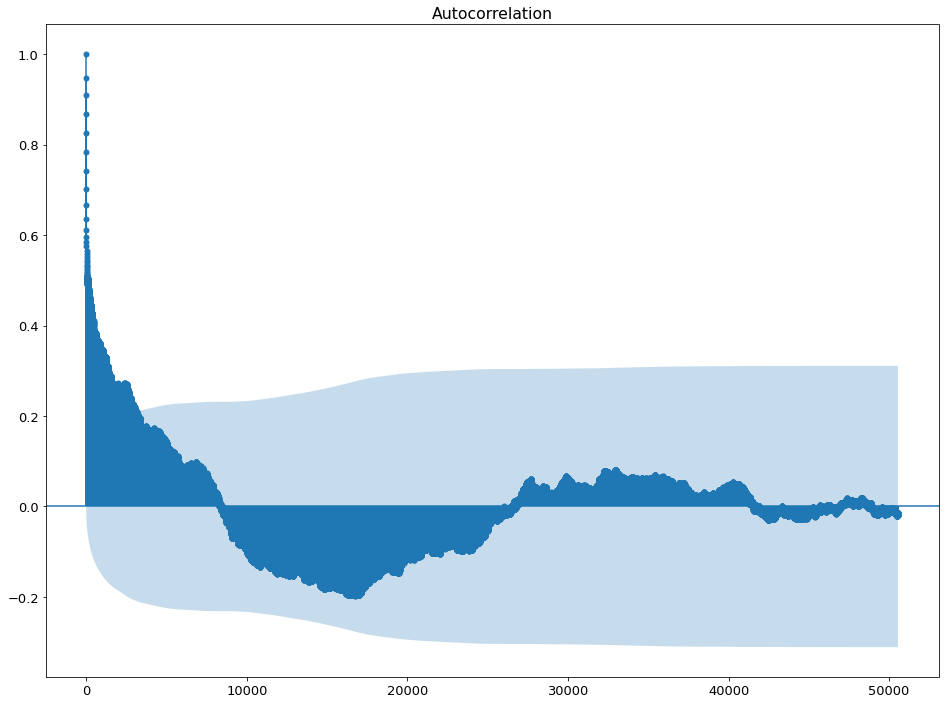

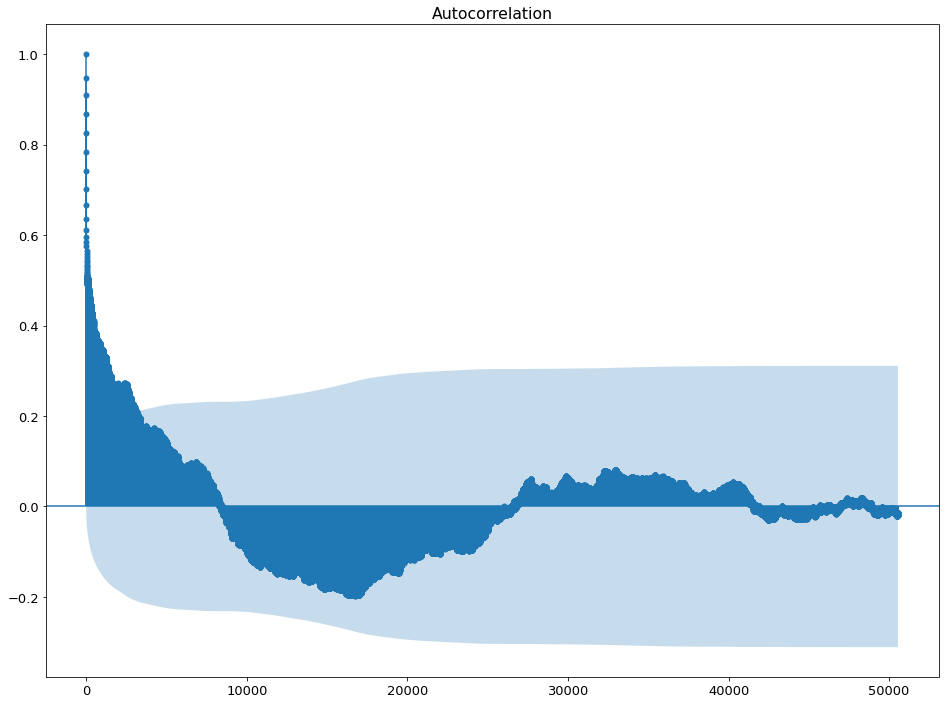

In [25]:
plot_acf(df_session_18['mean_hr'].dropna(), lags=50550)

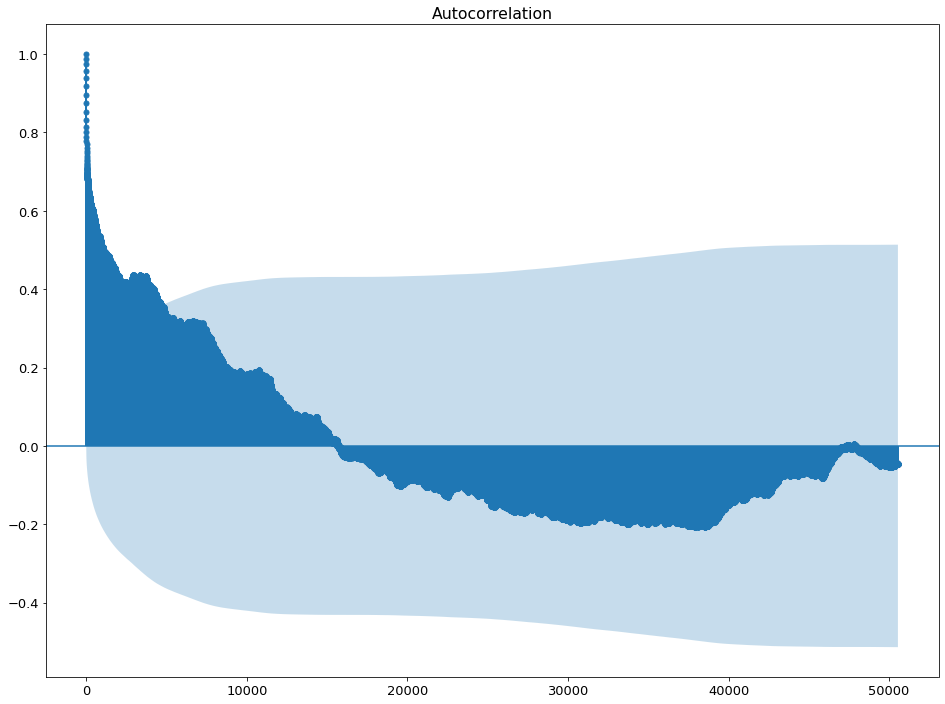

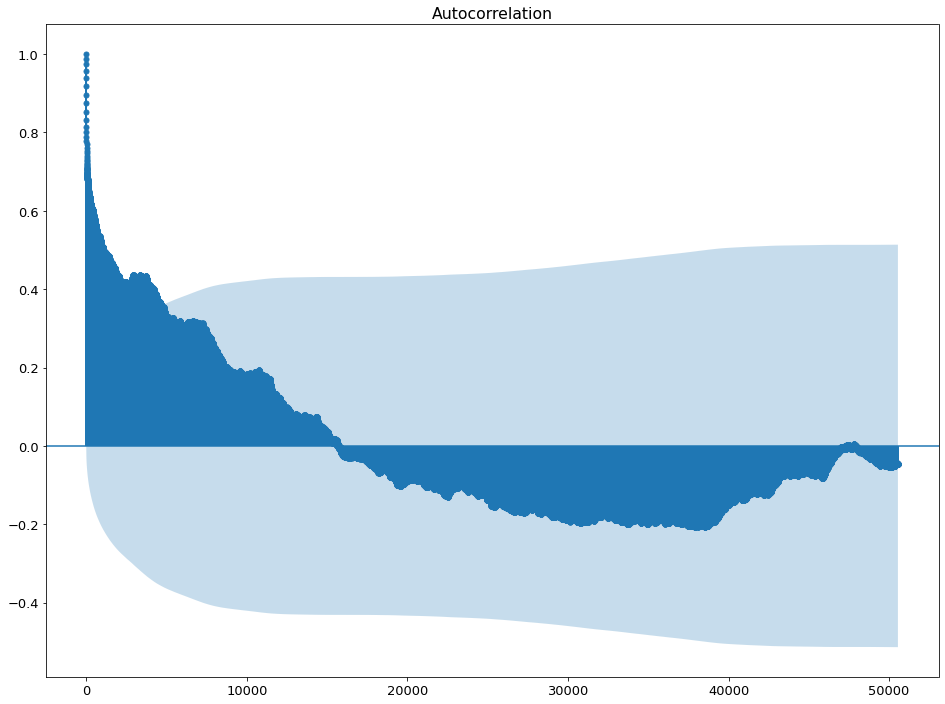

In [26]:
plot_acf(df_session_50['mean_hr'].dropna(), lags=50550)